### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

### Read in the csv files and remove duplicates

In [2]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

In [4]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv("crime.csv", encoding="ISO-8859-11")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
crime.head() # Quick check on how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018.0,9.0,Sunday,13.0,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018.0,8.0,Tuesday,0.0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018.0,9.0,Monday,19.0,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018.0,9.0,Monday,21.0,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018.0,9.0,Monday,21.0,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
crime.shape # Checking the shape of the data. It has 319,073 rows and 17 columns

(86451, 17)

In [9]:
crime.duplicated().sum() # Counting the duplicate rows

0

In [10]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [11]:
crime.shape # Checking the shape again to see if dropping the duplicate rows worked

(86451, 17)

### Explore the dataset

In [12]:
crime.head() # Quick check of the beginning of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018.0,9.0,Sunday,13.0,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018.0,8.0,Tuesday,0.0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018.0,9.0,Monday,19.0,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018.0,9.0,Monday,21.0,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018.0,9.0,Monday,21.0,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [13]:
crime.tail() # Quick check of the end of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
86446,I172086107,613,Larceny,LARCENY SHOPLIFTING,D4,129,NaN,2017-10-14 16:10:00,2017.0,10.0,Saturday,16.0,Part One,BOYLSTON ST,42.348624,-71.082776,"(42.34862382, -71.08277637)"
86447,I172086106,3201,Property Lost,PROPERTY - LOST,A1,103,NaN,2017-10-15 12:00:00,2017.0,10.0,Sunday,12.0,Part Three,SCHOOL ST,42.357889,-71.060100,"(42.35788876, -71.06010047)"
86448,I172086105,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C6,186,NaN,2017-10-15 14:36:00,2017.0,10.0,Sunday,14.0,Part Three,WILLOW CT,42.324905,-71.064335,"(42.32490502, -71.06433480)"
86449,I172086104,1402,Vandalism,VANDALISM,B3,464,NaN,2017-10-15 14:09:00,2017.0,10.0,Sunday,14.0,Part Two,BLUE HILL AVE,42.290122,-71.089649,"(42.29012204, -71.08964896)"
86450,I172086103,3207,Property Found,PROPERTY - FOUND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018.0,9.0,Sunday,13.0,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018.0,8.0,Tuesday,0.0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018.0,9.0,Monday,19.0,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018.0,9.0,Monday,21.0,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018.0,9.0,Monday,21.0,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86446,I172086107,613,Larceny,LARCENY SHOPLIFTING,D4,129,NaN,2017-10-14 16:10:00,2017.0,10.0,Saturday,16.0,Part One,BOYLSTON ST,42.348624,-71.082776,"(42.34862382, -71.08277637)"
86447,I172086106,3201,Property Lost,PROPERTY - LOST,A1,103,NaN,2017-10-15 12:00:00,2017.0,10.0,Sunday,12.0,Part Three,SCHOOL ST,42.357889,-71.060100,"(42.35788876, -71.06010047)"
86448,I172086105,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C6,186,NaN,2017-10-15 14:36:00,2017.0,10.0,Sunday,14.0,Part Three,WILLOW CT,42.324905,-71.064335,"(42.32490502, -71.06433480)"
86449,I172086104,1402,Vandalism,VANDALISM,B3,464,NaN,2017-10-15 14:09:00,2017.0,10.0,Sunday,14.0,Part Two,BLUE HILL AVE,42.290122,-71.089649,"(42.29012204, -71.08964896)"


In [15]:
crime.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86451 entries, 0 to 86450
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      86451 non-null  object 
 1   OFFENSE_CODE         86451 non-null  int64  
 2   OFFENSE_CODE_GROUP   86451 non-null  object 
 3   OFFENSE_DESCRIPTION  86451 non-null  object 
 4   DISTRICT             85725 non-null  object 
 5   REPORTING_AREA       86450 non-null  object 
 6   SHOOTING             277 non-null    object 
 7   OCCURRED_ON_DATE     86450 non-null  object 
 8   YEAR                 86450 non-null  float64
 9   MONTH                86450 non-null  float64
 10  DAY_OF_WEEK          86450 non-null  object 
 11  HOUR                 86450 non-null  float64
 12  UCR_PART             86424 non-null  object 
 13  STREET               84979 non-null  object 
 14  Lat                  80924 non-null  float64
 15  Long                 80924 non-null 

In [16]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [17]:
# Check if it worked
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86451 entries, 0 to 86450
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   INCIDENT_NUMBER      86451 non-null  object        
 1   OFFENSE_CODE         86451 non-null  int64         
 2   OFFENSE_CODE_GROUP   86451 non-null  object        
 3   OFFENSE_DESCRIPTION  86451 non-null  object        
 4   DISTRICT             85725 non-null  object        
 5   REPORTING_AREA       86450 non-null  object        
 6   SHOOTING             277 non-null    object        
 7   OCCURRED_ON_DATE     86450 non-null  datetime64[ns]
 8   YEAR                 86450 non-null  float64       
 9   MONTH                86450 non-null  float64       
 10  DAY_OF_WEEK          86450 non-null  object        
 11  HOUR                 86450 non-null  float64       
 12  UCR_PART             86424 non-null  object        
 13  STREET               84979 non-

In [18]:
# easily extract datetime information frome the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
86446    2017.0
86447    2017.0
86448    2017.0
86449    2017.0
86450       NaN
Name: OCCURRED_ON_DATE, Length: 86451, dtype: float64

In [19]:
crime.OCCURRED_ON_DATE.dt.month

0         9.0
1         8.0
2         9.0
3         9.0
4         9.0
         ... 
86446    10.0
86447    10.0
86448    10.0
86449    10.0
86450     NaN
Name: OCCURRED_ON_DATE, Length: 86451, dtype: float64

In [21]:
crime.OCCURRED_ON_DATE.dt.week

AttributeError: 'DatetimeProperties' object has no attribute 'week'

In [22]:
crime.OCCURRED_ON_DATE.dt.hour

0        13.0
1         0.0
2        19.0
3        21.0
4        21.0
         ... 
86446    16.0
86447    12.0
86448    14.0
86449    14.0
86450     NaN
Name: OCCURRED_ON_DATE, Length: 86451, dtype: float64

In [23]:
crime.OCCURRED_ON_DATE.dt.minute

0         0.0
1         0.0
2        27.0
3        16.0
4         5.0
         ... 
86446    10.0
86447     0.0
86448    36.0
86449     9.0
86450     NaN
Name: OCCURRED_ON_DATE, Length: 86451, dtype: float64

In [24]:
crime.describe() # summary information on the numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,86451.000000,86450,86450.000000,86450.000000,86450.000000,80924.000000,80924.000000
mean,2357.256562,2018-03-26 01:53:59.774875904,2017.756576,6.205552,13.069636,42.154379,-70.811990
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2018-01-03 20:48:45,2018.000000,3.000000,9.000000,42.296437,-71.097374
50%,3006.000000,2018-03-31 17:49:30,2018.000000,6.000000,14.000000,42.325161,-71.077683
75%,3205.000000,2018-06-16 21:34:00,2018.000000,8.000000,18.000000,42.348464,-71.062452
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1177.899089,NaN,0.433336,3.417925,6.278713,2.689264,4.350287


In [25]:
crime.describe(include='object') # summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,86451,86451,86451,85725,86450,277,86450,86424,84979,86450
unique,76764,64,184,12,875,1,7,4,3533,12630
top,I182065208,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,10,10251,5832,13039,6017,277,13150,44805,3991,5526


In [26]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]

Index(['DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long',
       'Location'],
      dtype='object')

In [27]:
# Checking for the number of missing values in each column
print('Missing values in each column \n')
crime[crime.columns].isnull().sum()

Missing values in each column 



INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 726
REPORTING_AREA             1
SHOOTING               86174
OCCURRED_ON_DATE           1
YEAR                       1
MONTH                      1
DAY_OF_WEEK                1
HOUR                       1
UCR_PART                  27
STREET                  1472
Lat                     5527
Long                    5527
Location                   1
dtype: int64

In [28]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION'],
      dtype='object')

In [29]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 76764 unique values
OFFENSE_CODE has 184 unique values
OFFENSE_CODE_GROUP has 64 unique values
OFFENSE_DESCRIPTION has 184 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 875 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 64017 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 3533 unique values
Lat has 12619 unique values
Long has 12624 unique values
Location has 12630 unique values


### Let's answer some questions

In [30]:
# What are the most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    10251
Medical Assistance                  7138
Larceny                             6911
Investigate Person                  5421
Other                               4899
                                   ...  
Explosives                             7
Gambling                               3
Biological Threat                      1
Manslaughter                           1
INVESTIGATE PERSON                     1
Name: count, Length: 64, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.118576
Medical Assistance                 0.082567
Larceny                            0.079941
Investigate Person                 0.062706
Other                              0.056668
Simple Assault                     0.053776
Drug Violation                     0.046755
Verbal Disputes                    0.044950
Vandalism                          0.042972
Towed                              0.038773
Name: count, dtype: float64

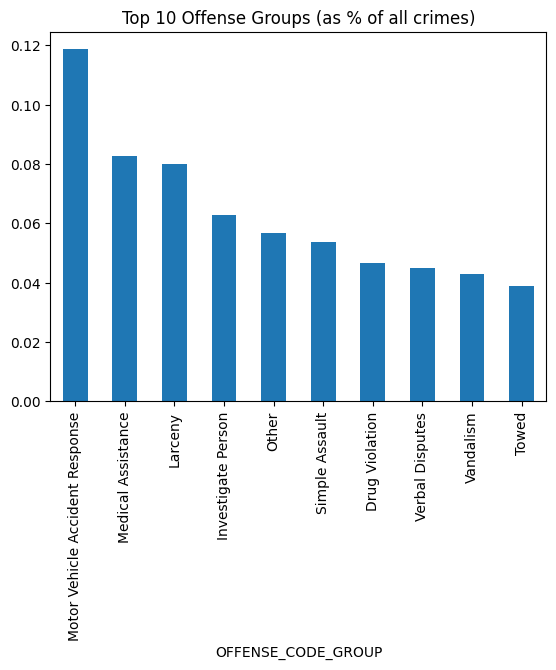

In [31]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals / crime.shape[0])

# Creating a bar chart of the Top 10 offense groups
(offense_group_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [32]:
# What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
INVESTIGATE PERSON        1
Manslaughter              1
Biological Threat         1
Gambling                  3
Explosives                7
Prostitution              8
Aircraft                  9
Bomb Hoax                11
Phone Call Complaints    13
Arson                    22
Name: count, dtype: int64

In [33]:
# Question 1 - What are the most common offense descriptions?
# Hint - Use value_counts() to print out the values
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            5832
INVESTIGATE PERSON                       5422
M/V - LEAVING SCENE - PROPERTY DAMAGE    4435
ASSAULT SIMPLE - BATTERY                 4310
VERBAL DISPUTE                           3886
                                         ... 
WEAPON - FIREARM - SALE / TRAFFICKING       1
BIOLOGICAL THREATS                          1
MANSLAUGHTER - VEHICLE - NEGLIGENCE         1
PRISONER ATTEMPT TO RESCUE                  1
CUSTODIAL KIDNAPPING                        1
Name: count, Length: 184, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.067460
INVESTIGATE PERSON                       0.062718
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051301
ASSAULT SIMPLE - BATTERY                 0.049855
VERBAL DISPUTE                           0.044950
VANDALISM                                0.042290
TOWED MOTOR VEHICLE                      0.038773
INVESTIGATE PROPERTY                     0.038658
PROPERTY - LOST                          0.030769
THREATS TO DO BODILY HARM                0.029404
Name: count, dtype: float64

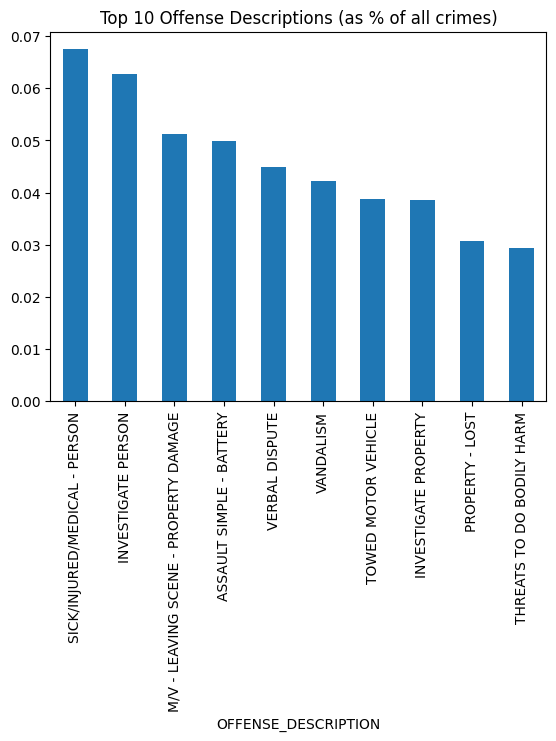

In [34]:
# Question 2 - Now try and create a bar chart of the Top 10 Offense Descriptions as a % of total crimes

offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

(offense_description_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Descriptions (as % of all crimes)');

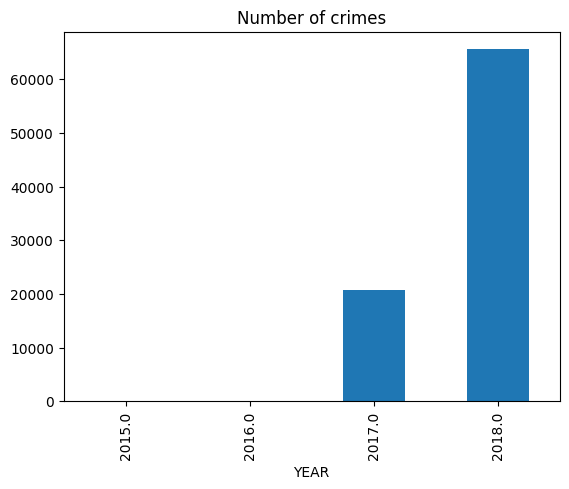

In [35]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

DAY_OF_WEEK
Friday       13150
Wednesday    12654
Tuesday      12612
Thursday     12587
Monday       12394
Saturday     12133
Sunday       10920
Name: INCIDENT_NUMBER, dtype: int64

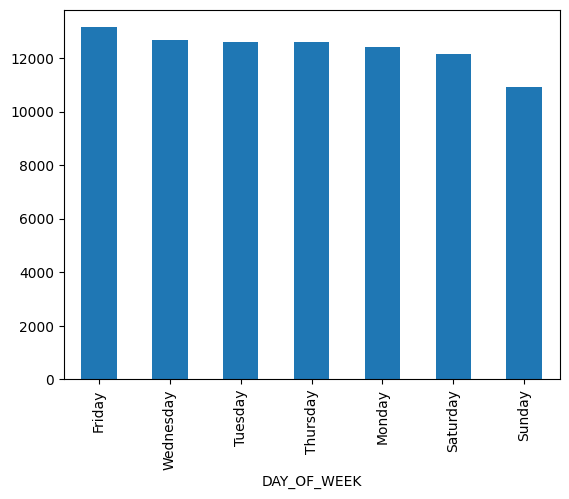

In [36]:
# Question 3 - Are there more crimes committed on specific days?

display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False));

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');

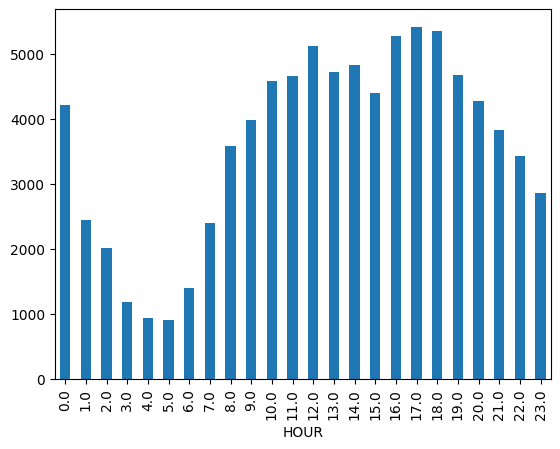

In [37]:
# Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

In [38]:
# On what days and during which hours are the most crimes committed?

In [39]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [40]:
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

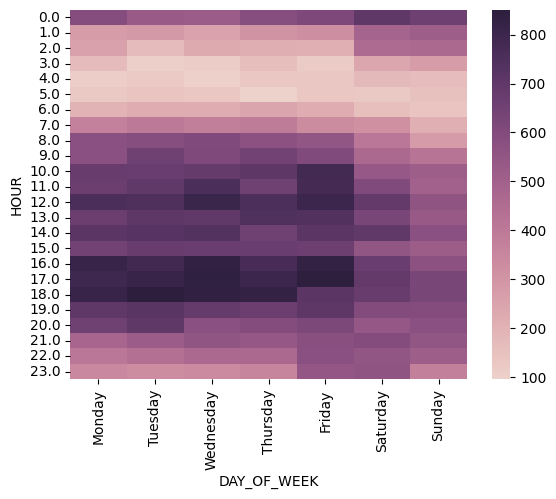

In [41]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [42]:
# In which months were the number of crimes below average?
# In which months on average did the most crimes occur?

In [43]:
# if the value is less than the average crime per month, highlight the value in blue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crimes is 2161.25


YEAR,2015.000000,2016.000000,2017.000000,2018.000000
MONTH,,,,
1.000000,nan,9.000000,21.000000,7745.000000
2.000000,nan,2.000000,15.000000,6926.000000
3.000000,nan,6.000000,20.000000,7726.000000
4.000000,nan,7.000000,16.000000,7906.000000
5.000000,nan,6.000000,28.000000,8899.000000
6.000000,1.000000,10.000000,51.000000,8816.000000
7.000000,6.000000,5.000000,58.000000,8523.000000
8.000000,4.000000,7.000000,76.000000,8331.000000
9.000000,3.000000,7.000000,153.000000,667.000000


In [44]:
# Use apply to highlight the maximum in a column in darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015.000000,2016.000000,2017.000000,2018.000000
MONTH,,,,
1.000000,nan,9.000000,21.000000,7745.000000
2.000000,nan,2.000000,15.000000,6926.000000
3.000000,nan,6.000000,20.000000,7726.000000
4.000000,nan,7.000000,16.000000,7906.000000
5.000000,nan,6.000000,28.000000,8899.000000
6.000000,1.000000,10.000000,51.000000,8816.000000
7.000000,6.000000,5.000000,58.000000,8523.000000
8.000000,4.000000,7.000000,76.000000,8331.000000
9.000000,3.000000,7.000000,153.000000,667.000000


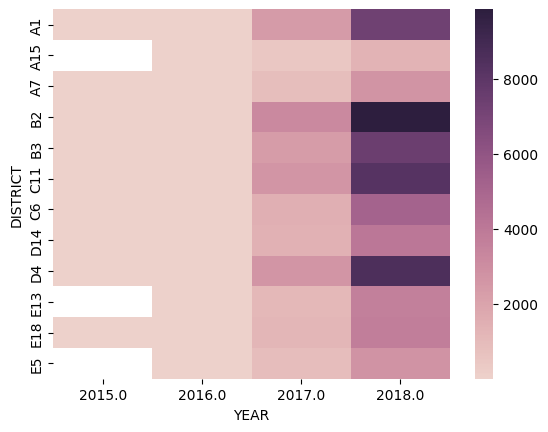

In [45]:
# Question 4 - In which districts were the most crimes commmitted on yearly basis?
# Try and use everything you've learned in this video to answer this question.
# Feel free to use functions, tables and other visuals.

district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [46]:
# if the value is less than the average crime per district per year, highlight the value in blue

avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 1905.0


YEAR,2015.000000,2016.000000,2017.000000,2018.000000
DISTRICT,,,,
A1,2.000000,11.000000,2395.000000,7356.000000
A15,nan,3.000000,445.000000,1322.000000
A7,1.000000,1.000000,875.000000,2719.000000
B2,1.000000,2.000000,3169.000000,9867.000000
B3,1.000000,8.000000,2317.000000,7479.000000
C11,8.000000,17.000000,2676.000000,8277.000000
C6,1.000000,6.000000,1497.000000,5191.000000
D14,2.000000,4.000000,1414.000000,4059.000000
D4,4.000000,10.000000,2636.000000,8563.000000


In [47]:
# Highlight the maximum value in each colummn with darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015.000000,2016.000000,2017.000000,2018.000000
DISTRICT,,,,
A1,2.000000,11.000000,2395.000000,7356.000000
A15,nan,3.000000,445.000000,1322.000000
A7,1.000000,1.000000,875.000000,2719.000000
B2,1.000000,2.000000,3169.000000,9867.000000
B3,1.000000,8.000000,2317.000000,7479.000000
C11,8.000000,17.000000,2676.000000,8277.000000
C6,1.000000,6.000000,1497.000000,5191.000000
D14,2.000000,4.000000,1414.000000,4059.000000
D4,4.000000,10.000000,2636.000000,8563.000000
